In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
torch.manual_seed(1)

In [ ]:
def load_data(train_batch_size, test_batch_size):
    # Fetch training data: total 60000 samples

    trainset = datasets.MNIST('data', train = True, download = False,
                transform = transforms.Compose([
                transforms.Resize((32,32)),
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,))
                ]))
    temp = torch.tensor(np.random.randint(0, 10, (len(trainset)),))
    trainset.targets = temp
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=train_batch_size, shuffle=True)

    testset = datasets.MNIST('data', train = False,
                transform = transforms.Compose([
                transforms.Resize((32, 32)),
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,))
                ]))
    test_loader = torch.utils.data.DataLoader(testset ,batch_size = test_batch_size, shuffle=True)

    return (train_loader, test_loader)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # flatten as one dimension
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        x = self.fc3(x)
        return x

In [ ]:
train_batch_size = 100
test_batch_size = 100
train_loader, test_loader = load_data(train_batch_size, test_batch_size)

In [ ]:
def train(model, optimizer, train_loader):
    model.train()
    correct = 0
    train_loss = 0
    counter = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        counter += 1
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        # Forward propagation
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.data

        pred = np.argmax(output.data, axis=1)
        correct += np.equal(pred, target.data).sum()

    train_loss = (train_loss * 100) / len(train_loader.dataset)
    acc = 100.0 * correct / len(train_loader.dataset)
    return train_loss, acc

In [ ]:
def test(model, epoch, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    for data, target in test_loader:
        data, target = Variable(data), Variable(target)

        output = model(data)
        loss = loss_fn(output, target)
        test_loss += loss.data

        pred = np.argmax(output.data, axis = 1)
        correct = correct + np.equal(pred, target.data).sum()

    # Print log
    test_loss = (test_loss * 100) / len(test_loader.dataset)
    print('\nTest set, Epoch {} , Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(epoch,
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss

In [ ]:
model = CNN()

optimizer = optim.Adam(model.parameters(), lr=0.0001)
m1_train_loss_arr = []
m1_test_loss_arr = []

epochs = 100
log_interval = 500
loss_fn = torch.nn.CrossEntropyLoss()
for epoch in range(1, epochs + 1):
    tr_loss, acc = train(model, optimizer, train_loader)
    m1_train_loss_arr.append(tr_loss)
    loss_test = test(model, epoch, test_loader)
    m1_test_loss_arr.append(loss_test)
    print('Epoch: ', epoch)
    print('Loss= ', tr_loss)


Test set, Epoch 1 , Average loss: 2.3026, Accuracy: 616/10000 (6%)

Epoch:  1
Loss=  tensor(2.3033)

Test set, Epoch 2 , Average loss: 2.2984, Accuracy: 1593/10000 (16%)

Epoch:  2
Loss=  tensor(2.3025)

Test set, Epoch 3 , Average loss: 2.2983, Accuracy: 1305/10000 (13%)

Epoch:  3
Loss=  tensor(2.3021)

Test set, Epoch 4 , Average loss: 2.2995, Accuracy: 744/10000 (7%)

Epoch:  4
Loss=  tensor(2.3017)

Test set, Epoch 5 , Average loss: 2.2992, Accuracy: 512/10000 (5%)

Epoch:  5
Loss=  tensor(2.3011)

Test set, Epoch 6 , Average loss: 2.3019, Accuracy: 497/10000 (5%)

Epoch:  6
Loss=  tensor(2.3003)

Test set, Epoch 7 , Average loss: 2.3017, Accuracy: 883/10000 (9%)

Epoch:  7
Loss=  tensor(2.2995)

Test set, Epoch 8 , Average loss: 2.3027, Accuracy: 388/10000 (4%)

Epoch:  8
Loss=  tensor(2.2983)

Test set, Epoch 9 , Average loss: 2.3081, Accuracy: 531/10000 (5%)

Epoch:  9
Loss=  tensor(2.2971)

Test set, Epoch 10 , Average loss: 2.3086, Accuracy: 688/10000 (7%)

Epoch:  10
Loss= 

In [ ]:
temp_1 = []
for i in m1_train_loss_arr:
    temp_1.append(i.data.numpy().tolist())
temp_2 = []
for i in m1_test_loss_arr:
    temp_2.append(i.data.numpy().tolist())

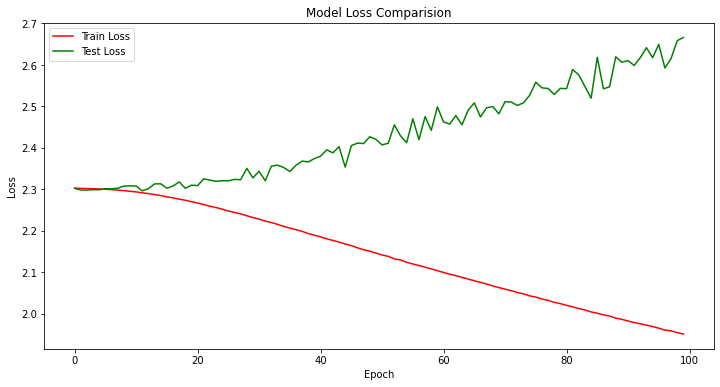

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 100, 1), temp_1, color = "r")
plt.plot(np.arange(0, 100, 1), temp_2, color = "g")
plt.title('Model Loss Comparision')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()